In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
# importing data frame
concrete = pd.read_csv('concrete.csv')

concrete.drop('Unnamed: 0', axis=1, inplace=True)

concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer','CoarseAggregate', 'FineAggregate', 'Age']]
y = concrete['CompressiveStrength']

In [5]:
X = sm.add_constant(X)

In [6]:
model = sm.OLS(y,X).fit()

In [7]:
predictions = model.predict(X)

In [8]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS                 Adj. R-squared:     0.613    
Dependent Variable: CompressiveStrength AIC:                7755.9240
Date:               2020-12-27 11:23    BIC:                7800.3598
No. Observations:   1030                Log-Likelihood:     -3869.0  
Df Model:           8                   F-statistic:        204.3    
Df Residuals:       1021                Prob (F-statistic): 6.29e-206
R-squared:          0.616               Scale:              108.14   
---------------------------------------------------------------------
                     Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
---------------------------------------------------------------------
const               -23.3312  26.5855 -0.8776 0.3804 -75.4997 28.8373
Cement                0.1198   0.0085 14.1129 0.0000   0.1031  0.1365
BlastFurnaceSlag      0.1039   0.0101 10.2474 0.0000   0.0840  0.1238
FlyAsh                0.0879   0.0126  6.9882 0.0000   0.0632  0.1126
Water                -0.1499   0.0402 -3.7314 0.0002  -0.2288 -0.0711
Superplasticizer      0.2922   0.0934  3.1279 0.0018   0.1089  0.4755
CoarseAggregate       0.0181   0.0094  1.9257 0.0544  -0.0003  0.0365
FineAggregate         0.0202   0.0107  1.8867 0.0595  -0.0008  0.0412
Age                   0.1142   0.0054 21.0464 0.0000   0.1036  0.1249
---------------------------------------------------------------------
Omnibus:                5.378         Durbin-Watson:           1.282 
Prob(Omnibus):          0.068         Jarque-Bera (JB):        5.304 
Skew:                   -0.174        Prob(JB):                0.071 
Kurtosis:               3.045         Condition No.:           106075
=====================================================================
* The condition number is large (1e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [9]:
# Adjusted R Square : R Square tends to increase even if the additional input do not add any value to the model. Adjusted R ßquare compensates for it. 
# R Square measures the proportion of variability explained by feautre on the target. 

# R Square = 1 - (SSE/SST)
# Adjusted R Square = 1 - [(1-Rsquare)(n-1)/(n-k-1)]

# n : number of samples
# k : number of features

# Adj. R Sqaure pf 0.613 means 61 % of variatios in the increase in compresive strength is explained by the features used in the model

In [10]:
# AIC and BIC will be used when we have different models to compare.

# AIC determines the relative informational value of the model using the maximum likelihood estimation and number of features
# AIC = 2k - 2ln(L) where k is the number of features and L is the maximum likelihood estimation
# For a number of different model, AIC with the lowest value will be chosen as the best model

# BIC similar as AIC but based on Bayesian estimates. Similarly the lowest value be chosen.

In [11]:
# Std. Error of the variable measures how much uncertainity is asscoaited with each variable. Lower the better.
# t stat is coefficient / std. error. Cememnt stands 14 std. deviation from Zero. 
# p >|t| means the p value of each variable and how significant are these variables
# [0.025 0.975] : The range for confidence for each variable. For example in case of "age" , we are 95% confident that a one year increase in age 
# will correspond to 0.1026 and 0.1249 increase in compressive strength, while keeping other factors constant

In [12]:
# we can see from the above model that "Fine Aggregate" and "Coarse Aggregate" has p value much higher and 95% confidennce has 0 in the range. 
# Let's remove these two feature and run the model again to see if we improved.

In [13]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer','Age']]
y = concrete['CompressiveStrength']
X = sm.add_constant(X)

In [14]:
model = sm.OLS(y,X).fit()

In [15]:
predictions = model.predict(X)

In [16]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS                 Adj. R-squared:     0.612    
Dependent Variable: CompressiveStrength AIC:                7755.9279
Date:               2020-12-27 11:24    BIC:                7790.4891
No. Observations:   1030                Log-Likelihood:     -3871.0  
Df Model:           6                   F-statistic:        271.2    
Df Residuals:       1023                Prob (F-statistic): 1.67e-207
R-squared:          0.614               Scale:              108.35   
---------------------------------------------------------------------
                      Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                28.9930   4.2132   6.8815 0.0000 20.7255 37.2605
Cement                0.1054   0.0042  24.8248 0.0000  0.0971  0.1137
BlastFurnaceSlag      0.0865   0.0050  17.3854 0.0000  0.0767  0.0962
FlyAsh                0.0687   0.0077   8.8766 0.0000  0.0535  0.0838
Water                -0.2181   0.0211 -10.3215 0.0000 -0.2596 -0.1766
Superplasticizer      0.2403   0.0846   2.8417 0.0046  0.0744  0.4063
Age                   0.1135   0.0054  20.9880 0.0000  0.1029  0.1241
---------------------------------------------------------------------
Omnibus:               5.229          Durbin-Watson:            1.286
Prob(Omnibus):         0.073          Jarque-Bera (JB):         5.189
Skew:                  -0.174         Prob(JB):                 0.075
Kurtosis:              3.019          Condition No.:            4662 
=====================================================================
* The condition number is large (5e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [17]:
# The new model's Adjusted R Square is still same at 61 % so no improvements.
# The coefficient for "Cemenrt" is 0.1054 with 95% CI between 0.0971 and 0.1137 it means that with one unit increase in cement , the Compressive Strength increase by 0.1054
# Also the 95 % CI tells that if we repeat this procedure numerous times, around 95 % probablity that caluclated CI from some future experiments encompasses the value of cement coefficient 
# between 0.09 and 0.11

In [18]:
# SST : Sum of Square Total : Sum of Squared difference between the observed dependent variable and its mean of dependent variable
# SSR : Sum of Square due to Regression : Sum of the squared difference between the predicated value and mean of the dependent variable
# SSE : Sum of Square Error : Sum of squared between the observed value and the predicted value
# SST = SSE + SSR

In [19]:
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [20]:
# Let's see if we can improve model performance by "feature scaling" the features.

# Some machine learning models are more prne to get impacted through different scales for features. Examples are regression and neural network

# KNN, K Means and SVM uses distance between points to determine similarity hence they might also get impacted. 


# There are two main types of feature scaling 

# Normalization : Converts between 0 to 1. Also known as min max scaling.

# x norm = (x-min(x))/ (max(x)-min(x))

# Standardization : Converts values towards centered around mean with a unit standard deviation . Mean becomes zero 
# and resulting distribution has a unit standard deviation

# x` = (x-mu)/(sigma)

# mu is the mean and sigma is the standard deviation



In [25]:
# importing sklearn preprocessing to do min max scaling

from sklearn.preprocessing import MinMaxScaler

In [22]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer','Age']]
y = concrete['CompressiveStrength']

In [28]:
min_max_scaler = MinMaxScaler()

In [34]:
X = pd.DataFrame(min_max_scaler.fit_transform(X.values), columns=X.columns,index=X.index)


In [36]:
X = sm.add_constant(X)

In [37]:
model = sm.OLS(y,X).fit()

In [38]:
predictions = model.predict(X)

In [39]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS                 Adj. R-squared:     0.612    
Dependent Variable: CompressiveStrength AIC:                7755.9279
Date:               2020-12-27 11:37    BIC:                7790.4891
No. Observations:   1030                Log-Likelihood:     -3871.0  
Df Model:           6                   F-statistic:        271.2    
Df Residuals:       1023                Prob (F-statistic): 1.67e-207
R-squared:          0.614               Scale:              108.35   
---------------------------------------------------------------------
                   Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
---------------------------------------------------------------------
const              13.2955   1.8359   7.2419 0.0000   9.6929  16.8981
Cement             46.1711   1.8599  24.8248 0.0000  42.5215  49.8207
BlastFurnaceSlag   31.0779   1.7876  17.3854 0.0000  27.5701  34.5856
FlyAsh             13.7389   1.5478   8.8766 0.0000  10.7018  16.7761
Water             -27.3047   2.6454 -10.3215 0.0000 -32.4957 -22.1136
Superplasticizer    7.7380   2.7231   2.8417 0.0046   2.3946  13.0814
Age                41.3110   1.9683  20.9880 0.0000  37.4486  45.1735
---------------------------------------------------------------------
Omnibus:               5.229          Durbin-Watson:            1.286
Prob(Omnibus):         0.073          Jarque-Bera (JB):         5.189
Skew:                  -0.174         Prob(JB):                 0.075
Kurtosis:              3.019          Condition No.:            14   
=====================================================================

"""

In [40]:
# As you can see there is no improvement in the model with "feature scaling"
# Probably we have features that we do not need. Although we did earlier by looking at p value. 
# Let's also make it work through some cool methods available to us through sklearn

In [41]:
# Feature Selection is done to get the following benefits.

# Curse of dimensionality : In this model , we have just 10 features but in many real life problesm we may have 100s if not 1000s of variables.
# Feature selection helps to remove the curse of dimensionality

# Overfitting reduction : Since we will not have multi-collinearity hence reduction in overfitting

# Accuracy : Model accuracy improves since less misleading data

In [42]:
from sklearn.feature_selection import SelectKBest, f_regression

In [45]:
test = SelectKBest(score_func=f_regression,k=5)

In [57]:
np.seterr(divide='ignore',invalid='ignore')
X_selected = test.fit(X,y)

In [60]:
cols = X_selected.get_support(indices=True)

In [62]:
new_feature = X.columns[cols]

In [63]:
new_feature

Index(['Cement', 'BlastFurnaceSlag', 'Water', 'Superplasticizer', 'Age'], dtype='object')

In [64]:
X.columns

Index(['const', 'Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water',
       'Superplasticizer', 'Age'],
      dtype='object')

In [65]:
# we can see that flyash has been removed as the feature. However we have used here the K as 5. What if k is not 5 and something else

In [66]:
# RFE : Recursive Feature Eliminition

In [68]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression

In [69]:
model = LinearRegression()

In [71]:
rfe = RFE(estimator=model,n_features_to_select=5)

In [72]:
fit = rfe.fit(X,y)

In [77]:
cols = fit.get_support(indices=True)

In [79]:
new_feature = X.columns[cols]

In [80]:
new_feature

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Age'], dtype='object')

In [81]:
# based on RFE it seems that FlyAsh is better predictor

In [92]:
# let's use the grid search to identify number of good predictors

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression

In [93]:
kbest_estimators = SelectKBest(f_regression)

pipeline = Pipeline([('kbest', kbest_estimators),('linear',LinearRegression())])

In [96]:
grid_search = GridSearchCV(pipeline,{'kbest__k':[1,2,3,4,5,6,7]})

In [97]:
grid_search.fit(X,y)

GridSearchCV(estimator=Pipeline(steps=[('kbest',
                                        SelectKBest(score_func=<function f_regression at 0x7facc2470310>)),
                                       ('linear', LinearRegression())]),
             param_grid={'kbest__k': [1, 2, 3, 4, 5, 6, 7]})

In [98]:
grid_search.best_estimator_

Pipeline(steps=[('kbest',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x7facc2470310>)),
                ('linear', LinearRegression())])

In [99]:
grid_search.best_params_

{'kbest__k': 7}

In [100]:
features = pipeline.named_steps['kbest']

In [103]:
# seems like the more number of feature you give the more it selects

In [104]:
# let's use one more technique to identify the feature importance

from sklearn.ensemble import ExtraTreesRegressor

In [105]:
model = ExtraTreesRegressor(n_estimators=100)

model.fit(X,y)

ExtraTreesRegressor()

In [106]:
model.feature_importances_

array([0.        , 0.27390622, 0.10333828, 0.04732712, 0.11349515,
       0.09279012, 0.36914312])

In [107]:
feats = {}

for feature, importance in zip(X.columns,model.feature_importances_):
    feats[feature] = importance


In [109]:
importance = pd.DataFrame.from_dict(feats,orient='index').rename(columns={0:'Pearson Relative importance'})

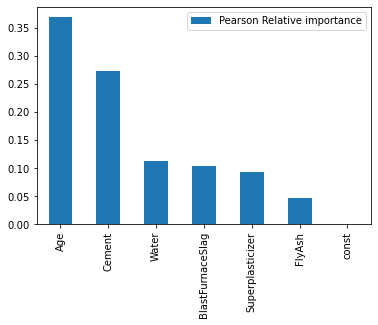

In [114]:
importance.sort_values(by='Pearson Relative importance',ascending=False).plot(kind='bar');

In [115]:
# let's also use RFECV to understand if we need all features

estimator = LinearRegression()

selector = RFECV(estimator,step=1,cv=5)

selector = selector.fit(X,y)

In [117]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True])

In [118]:
# seems like all of them got selected . Disapponting

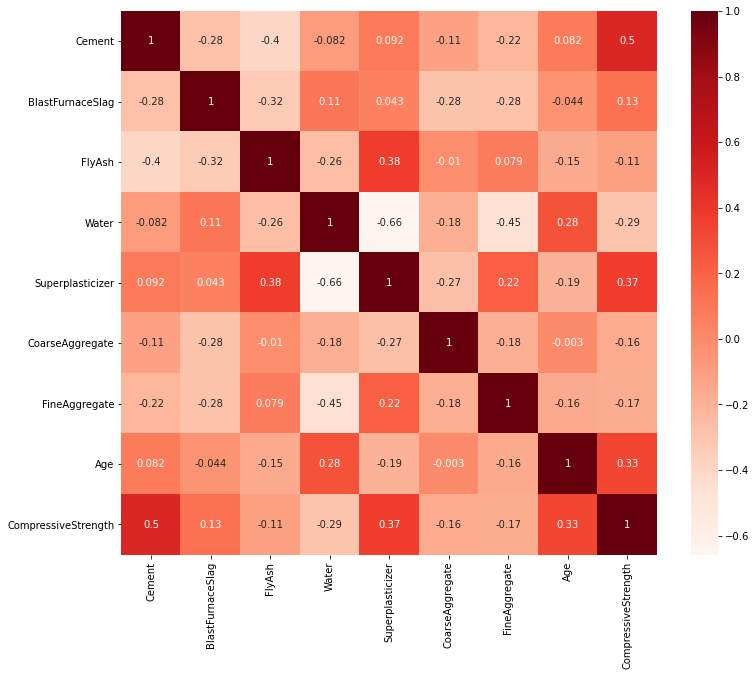

In [130]:
# let's see if we can use Pearson Correlation to understand the importance

plt.figure(figsize=(12,10))

cor = concrete.corr()

sns.heatmap(cor,annot=True, cmap=plt.cm.Reds)

plt.show()

In [123]:
# As we can see the highest correlation of compressive strength is with Cement on positive side and 
# Water on negative side

In [133]:
cor_target = abs(cor["CompressiveStrength"])

relevant_features = cor_target[cor_target>0.1]

In [137]:
relevant_features.sort_values(ascending=False)

CompressiveStrength    1.000000
Cement                 0.497832
Superplasticizer       0.366079
Age                    0.328873
Water                  0.289633
FineAggregate          0.167241
CoarseAggregate        0.164935
BlastFurnaceSlag       0.134829
FlyAsh                 0.105755
Name: CompressiveStrength, dtype: float64

In [139]:
from sklearn.linear_model import LassoCV, Lasso

In [140]:
from sklearn.feature_selection import SelectFromModel

In [142]:
selection = SelectFromModel(LinearRegression())

selection.fit(X,y)

SelectFromModel(estimator=LinearRegression())

In [143]:
selected_features = X.columns[(selection.get_support())]

In [144]:
selected_features

Index(['Cement', 'BlastFurnaceSlag', 'Age'], dtype='object')

In [145]:
# Seems like only 3 of these guys got selected

In [146]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'Age']]
y = concrete['CompressiveStrength']

X = sm.add_constant(X)

In [147]:
model = sm.OLS(y,X).fit()

In [154]:
print(model.summary2())

                   Results: Ordinary least squares
Model:              OLS                 Adj. R-squared:     0.413    
Dependent Variable: CompressiveStrength AIC:                8178.0129
Date:               2020-12-27 18:24    BIC:                8197.7621
No. Observations:   1030                Log-Likelihood:     -4085.0  
Df Model:           3                   F-statistic:        242.7    
Df Residuals:       1026                Prob (F-statistic): 5.25e-119
R-squared:          0.415               Scale:              163.70   
----------------------------------------------------------------------
                     Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------
const                2.9212    1.3402   2.1796  0.0295  0.2913  5.5510
Cement               0.0889    0.0040  22.3444  0.0000  0.0811  0.0968
BlastFurnaceSlag     0.0583    0.0048  12.1202  0.0000  0.0489  0.0677
Age                  0.0784    0.

In [149]:
# However when we run the model , its R Sqaure is much less than previously build model

In [150]:
# Let's look at residuals of the model

from statsmodels.stats.outliers_influence import OLSInfluence

In [151]:
influence = OLSInfluence(model)

In [153]:
influence.cooks_distance

(0       0.008034
 1       0.000853
 2       0.010619
 3       0.035012
 4       0.006470
           ...   
 1025    0.000120
 1026    0.000019
 1027    0.000032
 1028    0.000035
 1029    0.000006
 Length: 1030, dtype: float64,
 array([0.99987202, 0.99999855, 0.99977724, ..., 1.        , 1.        ,
        1.        ]))

In [155]:
concrete.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'],
      dtype='object')

In [156]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer','CoarseAggregate', 'FineAggregate', 'Age']]
y = concrete['CompressiveStrength']

In [157]:
X = sm.add_constant(X)

In [158]:
model = sm.OLS(y,X).fit()

In [160]:
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CompressiveStrength   R-squared:                       0.616
Model:                             OLS   Adj. R-squared:                  0.613
Method:                  Least Squares   F-statistic:                     204.3
Date:                 Sun, 27 Dec 2020   Prob (F-statistic):          6.29e-206
Time:                         18:27:28   Log-Likelihood:                -3869.0
No. Observations:                 1030   AIC:                             7756.
Df Residuals:                     1021   BIC:                             7800.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.3312   

In [161]:
#  Cement is statistically signifcant predictor (at the 0.05 level) , relative to a model with all other predictors includd

In [162]:
# with one unit change in Cement , the compressive strneght will increase by 0.12 holding the other predictor fixed